# Visualizar e salvar figuras do Teste 3

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
from time import time
from pathlib import Path

## Configurações para salvar as figuras

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {
    "figure.figsize":  [3.4, 2.1],
    "axes.labelsize":  8,
    "font.size":       8,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "axes.axisbelow":  True,
    "text.usetex":     True,
    "font.family":     "serif",
    "font.serif":      ["Times"]
}
plt.rcParams.update(params)

## Definição de funções

In [3]:
def printarMaisMetricas(dictResultado): 
    
    print("acuraciaMedia:           ", dictResultado["acuraciaMedia"])
    print("acuraciaDesvio:          ", dictResultado["acuraciaDesvio"])
    print("precisaoMedia:           ", dictResultado["precisaoMedia"])
    print("precisaoDesvio:          ", dictResultado["precisaoDesvio"])
    print("revocacaoMedia:          ", dictResultado["revocacaoMedia"])
    print("revocacaoDesvio:         ", dictResultado["revocacaoDesvio"])
    print("tempoProcessamentoMedio: ", dictResultado["tempoProcessamentoMedio"])
    print("tempoProcessamentoDesvio:", dictResultado["tempoProcessamentoDesvio"])
    print("somaMatrizesConfusao:    ", dictResultado["somaMatrizesConfusao"])

In [4]:
def printarProbabilidadeDeteccao(dictKey, dictResultado, dirSalvarFig):
    
    # CAMINHO PARA SALVAR A FIGURA
    nomeFig = "test_3_" + dictKey + "_"  + "_".join(dictResultado["featuresSelecionadas"]) + "_" + str(dictResultado["snr"]) + "_dB_" + str(dictResultado["qtdUsuarios"]) + "_users_" + str(dictResultado["qtdSimbolos"]) + "_symbols"
    pathSalvarFig = dirSalvarFig.resolve().joinpath(nomeFig + ".pdf")
    print("Figura salva em: " + str(pathSalvarFig))
    printarMaisMetricas(dictResultado)
    
    # RESGATANDO ARRAYS QUE VAO FAZER O PLOT
    rangePotEspiao                    = dictResultado["rangePotEspiao"]
    rangeQtdAntenas                   = dictResultado["rangeQtdAntenas"]
    matrizProbabilidadeDeteccaoMedia  = dictResultado["matrizProbabilidadeDeteccaoMedia"]
    matrizProbabilidadeDeteccaoDesvio = dictResultado["matrizProbabilidadeDeteccaoDesvio"]
    
    # MONTANDO A FIGURA DE PROBABILIDADES DE DETECCAO PARA CADA POTENCIA DE ESPIAO E CADA SNR
    for i in range(len(rangePotEspiao)):
        plt.errorbar(rangeQtdAntenas, matrizProbabilidadeDeteccaoMedia[i], yerr=matrizProbabilidadeDeteccaoDesvio[i], label="$P_{e} = "+str(rangePotEspiao[i])+"$")
    plt.xlabel("Antennas")
    plt.ylabel("$p_{d}$")
    plt.grid(alpha=0.5)
    plt.legend()
    plt.savefig(pathSalvarFig, bbox_inches="tight")
    plt.show()

## Abrindo o JSON de resultados

In [5]:
dirResultados            = Path("../../results/test_3/")
arquivoUltimosResultados = sorted(dirResultados.glob("detection_probability_*.json"))[-1]
dictResultados           = json.load(open(arquivoUltimosResultados))

## Printando

DECISIONTREECLASSIFIER_16232978495485291:
Figura salva em: C:\Users\PedroIvo\Documents\Github-Projects\Pilot-Contamination-Detection-Massive-MIMO\results\test_3\test_3_DecisionTreeClassifier_16232978495485291_E_10_dB_64_users_300_symbols.pdf
acuraciaMedia:            0.9926153846153847
acuraciaDesvio:           0.00269120856685168
precisaoMedia:            0.9933278638006167
precisaoDesvio:           0.0029366006337821237
revocacaoMedia:           0.9917912013056286
revocacaoDesvio:          0.003220555822896359
tempoProcessamentoMedio:  0.00018697287486149714
tempoProcessamentoDesvio: 2.4736921739741802e-05
somaMatrizesConfusao:     [[6457, 43], [53, 6447]]


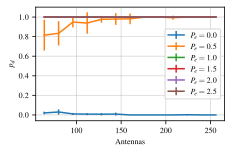



HASSAN_16232978511865118:
Figura salva em: C:\Users\PedroIvo\Documents\Github-Projects\Pilot-Contamination-Detection-Massive-MIMO\results\test_3\test_3_Hassan_16232978511865118_E_eta_10_dB_64_users_300_symbols.pdf
acuraciaMedia:            0.9672307692307692
acuraciaDesvio:           0.006174963766273664
precisaoMedia:            1.0
precisaoDesvio:           0.0
revocacaoMedia:           0.9345416859828262
revocacaoDesvio:          0.01195520401803992
tempoProcessamentoMedio:  1.5487670898437502e-05
tempoProcessamentoDesvio: 1.2919524672248287e-06
somaMatrizesConfusao:     [[6500, 0], [426, 6074]]


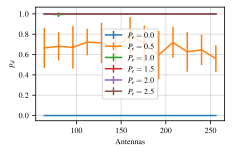

In [6]:
printarTestes = (
    ("tree",   ["E"]),
    ("hassan", ["E", "eta"]),
)

for tecnicaDeteccao, featuresSelecionadas in printarTestes:
    for key, values in dictResultados.items():
        if tecnicaDeteccao.upper() in key.upper() and featuresSelecionadas == values["featuresSelecionadas"]:
            print(key.upper() + ":")
            printarProbabilidadeDeteccao(key, values, dirResultados)
            print("\n")